[[-1.12754015 -0.59738073]
 [ 1.03412532 -0.3846241 ]
 [ 1.89879151 -0.27824578]
 [ 1.89879151  0.14726748]
 [ 0.16945913 -0.19314313]
 [ 1.89879151 -0.49100241]
 [ 0.16945913 -0.17186747]
 [ 1.89879151 -0.3846241 ]
 [ 1.03412532  0.04088917]
 [ 1.03412532 -0.27824578]]
Confusion Matrix : 
 [[46  2]
 [17 10]]
Accuracy :  0.7466666666666667


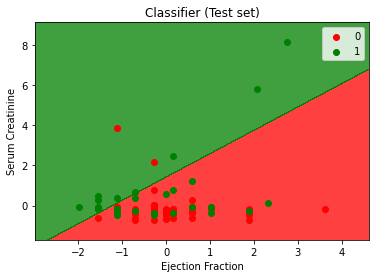

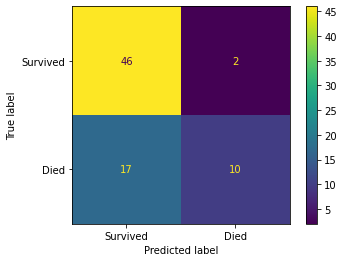

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# input
x = dataset.iloc[:, [4, 7]].values

# output
y = dataset.iloc[:, 12].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.xlabel('Ejection Fraction')
plt.ylabel('Serum Creatinine')
plt.legend()
plt.show()

# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Died'])
cmd.plot()